In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_st

In [2]:
print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (60000,)


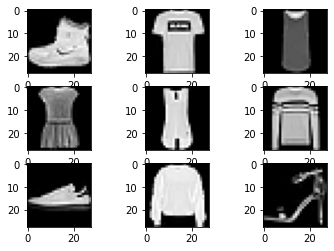

In [3]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [0]:
from keras.utils import to_categorical
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
!pip install tensorflow==1.14.0

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               3

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
callbacks_list = [
                  EarlyStopping(monitor='val_loss', patience=10),
                  ModelCheckpoint(filepath='mnist.h5', monitor='val_loss', save_best_only=True),
]

In [11]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

In [12]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"]="0"
with tf.device('/GPU:0'):
  history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 202us/sample - loss: 0.1098 - accuracy: 0.9622 - val_loss: 0.0649 - val_accuracy: 0.9747
Epoch 2/50
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0617 - accuracy: 0.9760 - val_loss: 0.0587 - val_accuracy: 0.9768
Epoch 3/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0541 - accuracy: 0.9789 - val_loss: 0.0590 - val_accuracy: 0.9776
Epoch 4/50
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0492 - accuracy: 0.9810 - val_loss: 0.0520 - val_accuracy: 0.9794
Epoch 5/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0460 - accuracy: 0.9821 - val_loss: 0.0541 - val_accuracy: 0.9794
Epoch 6/50
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0423 - accuracy: 0.9834 - val_loss: 0.0534 - val_accuracy: 0.9799
Epoch 7/50
60000/60000 [==============================

Text(0.5, 0, 'number of epochs')

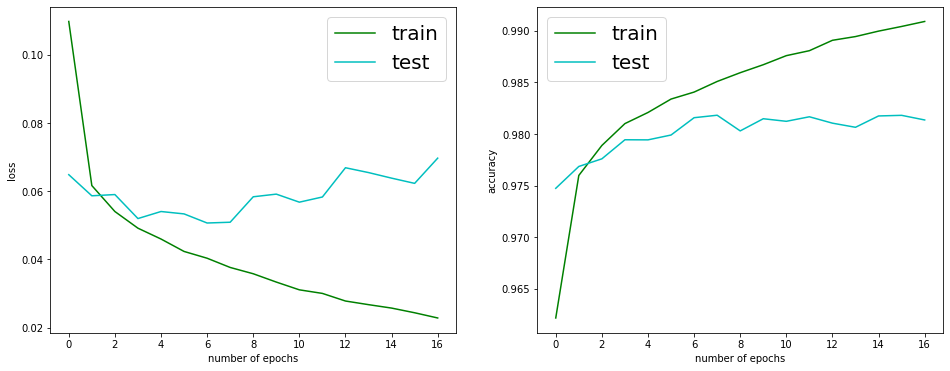

In [15]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'c-', label='test')
plt.legend(prop={'size':20})
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.subplot(1, 2, 2)
plt.plot(range(nepochs), history.history['accuracy'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'c-', label='test')
plt.legend(prop={'size':20})
plt.ylabel('accuracy')
plt.xlabel('number of epochs')